In [32]:
import scanpy as sc
import scvelo as scv
import cellrank as cr
import numpy as np

In [2]:
cr.__version__

'2.0.0'

Import data

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/alessandro.palma/scCFM/data/pancreas/rawdata/adata_pancreas_2019.h5ad")

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 6334 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.


/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

Extracted 2000 highly variable genes.
Logarithmized X.


/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Compute PCA and moments

In [5]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


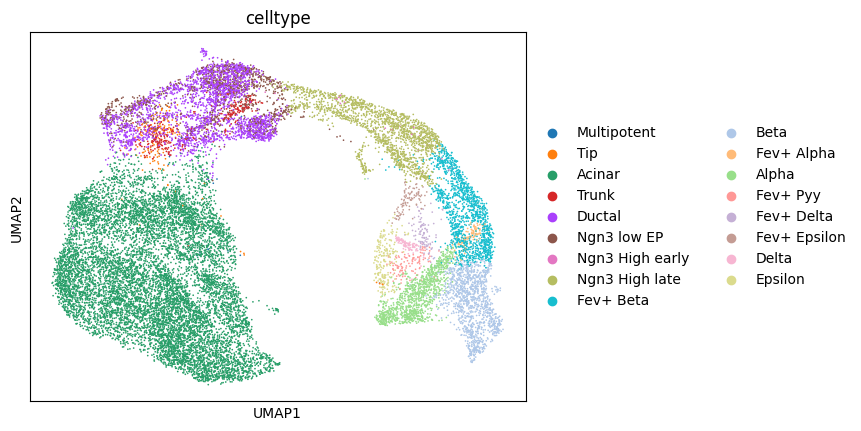

In [17]:
sc.pl.umap(adata, color="celltype")

In [18]:
adata.uns["celltype_colors"]=['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
        '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d']

In [19]:
# import matplotlib.pyplot as plt

# # List of color strings
# colors = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
#           '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
#           '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d']

# # Plotting a bar chart with each color
# fig, ax = plt.subplots(figsize=(10, 1))
# for i, color in enumerate(colors):
#     ax.fill_betweenx(y=[0, 1], x1=i, x2=i+1, color=color)

# # Removing y-axis and setting x-axis ticks
# ax.set_yticks([])
# ax.set_xticks(range(len(colors)))
# ax.set_xticklabels([])

# # Display the plot
# plt.show()

Plot scatter 

/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


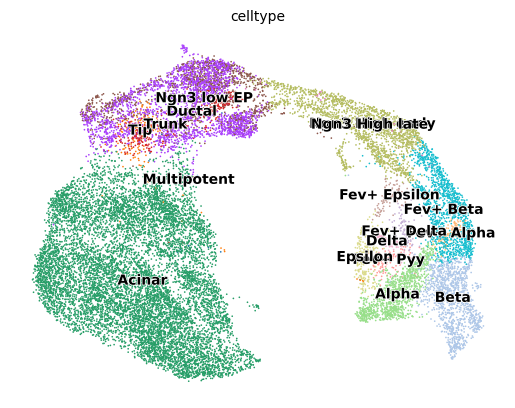

In [20]:
scv.pl.scatter(adata, basis="umap", color="celltype")

**Run velocity estimation**

In [21]:
scv.tl.recover_dynamics(adata, n_jobs=8)

recovering dynamics (using 8/112 cores)


  0%|          | 0/1342 [00:00<?, ?gene/s]

    finished (0:10:54) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [22]:
scv.tl.velocity(adata, mode="dynamical")

computing velocities
    finished (0:00:21) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [23]:
scv.tl.velocity_graph(adata, n_jobs=8)

computing velocity graph (using 8/112 cores)


  0%|          | 0/20519 [00:00<?, ?cells/s]

    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


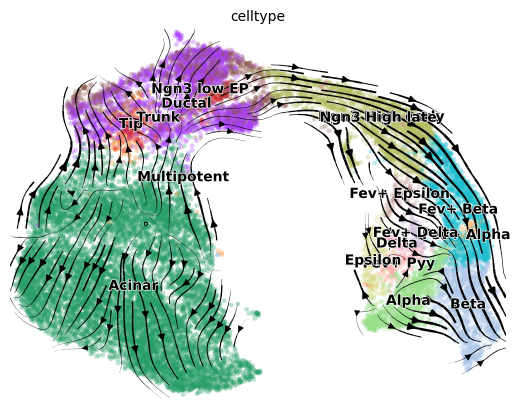

In [24]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="celltype")

## Run cellrank

In [25]:
vk = cr.kernels.VelocityKernel(adata)
vk.compute_transition_matrix()

  0%|          | 0/20519 [00:00<?, ?cell/s]

  0%|          | 0/20519 [00:00<?, ?cell/s]

VelocityKernel[n=20519, model='deterministic', similarity='correlation', softmax_scale=3.193]

In [26]:
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()

combined_kernel = 0.8 * vk + 0.2 * ck

In [27]:
adata

AnnData object with n_obs × n_vars = 20519 × 2000
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'velocity_self_transition'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'clusters_fig6_fine_final_colors', 'log1p', 'pca', 'neighbors', 'celltype_colors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'


In [28]:
g_vae = cr.estimators.GPCCA(vk)
g_vae.fit(n_states=15, cluster_key="celltype")

GPCCA[kernel=VelocityKernel[n=20519], initial_states=None, terminal_states=None]

/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


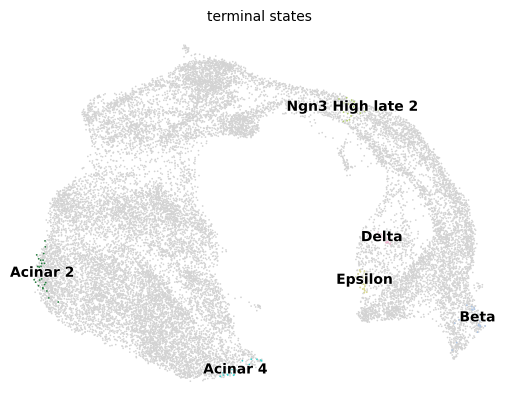

In [29]:
g_vae.predict_terminal_states(method="top_n", n_states=6)
g_vae.plot_macrostates(which="terminal")

In [30]:
scv.tl.velocity_confidence(adata)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


In [33]:
np.mean(adata.obs["velocity_confidence"])

0.8044727430335968